In [1]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Users/michaeltwardos/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [13]:
def exponResp(t, alpha):
    if t<0:
        return 0
    else:
        return math.exp(-alpha*t)
    
def computeDAUExp(cohorts, alpha, daysOut, beta):
    currentDay = len(cohorts)
    DAU = []
    #First Calculate DAU while cohorts are being acquired
    for t in range(currentDay):
        actives=[]
        for i in range(t):
            actives.append(beta*cohorts[t-i-1]*exponResp(i,alpha))
        DAU.append(sum(actives))
    #Now calculate more DAU as we project out after acquiring cohorts
    for t in range(daysOut):
        actives=[]
        for i in range(currentDay):
            actives.append(beta*cohorts[currentDay-i-1]*exponResp(t+i,alpha))
        DAU.append(sum(actives))
    return DAU 

In [14]:
def linResp(t, m):
    if t < 0:
        return 0
    elif 1 - m*t  > 0:
        return round(1 -m*t, 3)
    else:
        return 0
    
def computeDAULin(cohorts, alpha, daysOut, beta):
    currentDay = len(cohorts)
    DAU = []
    #First Calculate DAU while cohorts are being acquired
    for t in range(currentDay):
        actives=[]
        for i in range(t):
            actives.append(beta*cohorts[t-i-1]*linResp(i,alpha))
        DAU.append(sum(actives))
    #Now calculate more DAU as we project out after acquiring cohorts
    for t in range(daysOut):
        actives=[]
        for i in range(currentDay):
            actives.append(beta*cohorts[currentDay-i-1]*linResp(t+i,alpha))
        DAU.append(sum(actives))
    return DAU 

In [116]:
def powResp(t, n):
    if t < 1:
        return 0
    else:
        return float(1)/math.pow(t,n)
    
def computeDAUPow(cohorts, alpha, daysOut, beta):
    currentDay = len(cohorts)
    DAU = []
    #First Calculate DAU while cohorts are being acquired
    for t in range(currentDay):
        actives=[]
        for i in range(t):
            actives.append(beta*cohorts[t-i-1]*powResp(i+1,alpha))
        DAU.append(sum(actives))
    #Now calculate more DAU as we project out after acquiring cohorts
    for t in range(daysOut):
        actives=[]
        for i in range(currentDay):
            actives.append(beta*cohorts[currentDay-i-1]*powResp(t+i+1,alpha))
        DAU.append(sum(actives))
    return DAU 

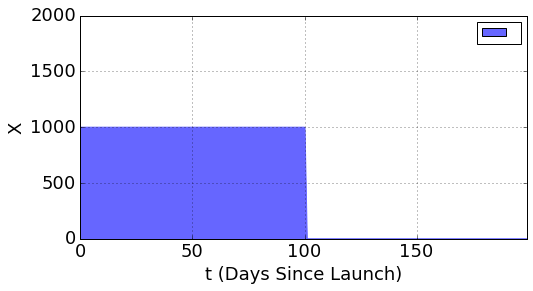

In [79]:
aCohort = []
for i in range(200):
    if i<= 100:
        aCohort.append(1000)
    else:
        aCohort.append(0)

df = pd.DataFrame(np.array(aCohort), columns=[''])
ax = df.plot(ylim=(0,2000), fontsize=18, kind='area', color='#6666ff', grid = True, figsize=(8, 4));
ax.set_xlabel("t (Days Since Launch)", fontsize=18)
ax.set_ylabel("X", fontsize=18)

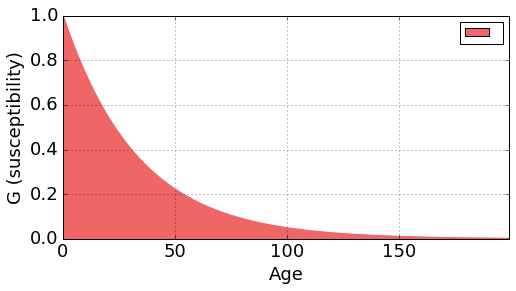

In [81]:
suscept = []
for i in range(200):
    suscept.append(exponResp(i,0.03))

        
df = pd.DataFrame(np.array(suscept), columns=[''])
ax = df.plot(ylim=(0,1), fontsize=18, kind='area', grid = True, figsize=(8, 4),  color='#ee6666');
ax.set_xlabel("t", fontsize=18)
ax.set_ylabel("G (susceptibility)", fontsize=18)

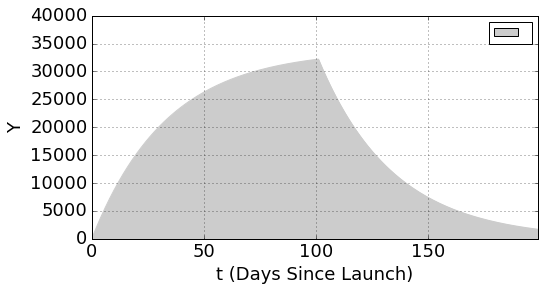

In [83]:

aDAU = computeDAUExp(aCohort, .03, 200,1)
df = pd.DataFrame(np.array(aDAU[0:200]), columns=[''])
#df.plot()
ax = df.plot(ylim=(0,40000), kind='area', color = '#cccccc', fontsize=18, grid = True, figsize=(8, 4));
ax.set_xlabel("t (Days Since Launch)", fontsize=18)
ax.set_ylabel("Y", fontsize=18)

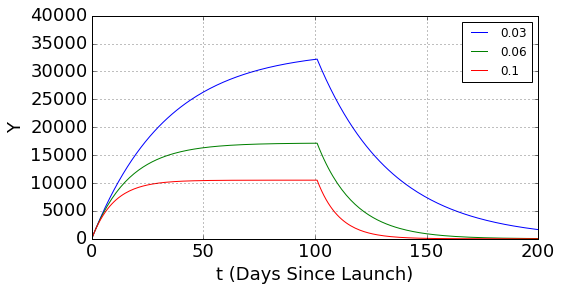

In [92]:
aDAU = computeDAUExp(aCohort, .03, 200,1)
bDAU = computeDAUExp(aCohort, .06, 200,1)
cDAU = computeDAUExp(aCohort, .1, 200,1)

zz=np.stack((np.array(aDAU), np.array(bDAU), np.array(cDAU)),axis=1)
df = pd.DataFrame(zz, columns=['0.03', '0.06', '0.1'])

ax = df.plot(ylim=(0,40000), xlim=(0,200),  fontsize=18, grid = True, figsize=(8, 4));
ax.set_xlabel("t (Days Since Launch)", fontsize=18)
ax.set_ylabel("Y", fontsize=18)

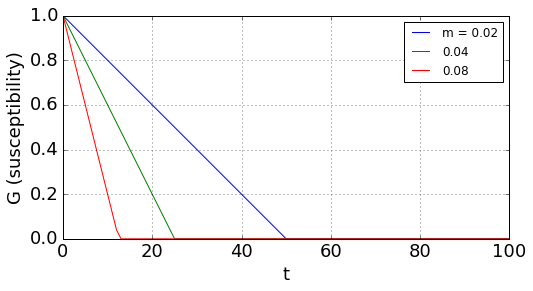

In [105]:
susceptA = []
susceptB = []
susceptC = []
for i in range(200):
    susceptA.append(linResp(i,0.02))
    susceptB.append(linResp(i,0.04))
    susceptC.append(linResp(i,0.08))

zz=np.stack((np.array(susceptA), np.array(susceptB), np.array(susceptC)),axis=1)
df = pd.DataFrame(zz, columns=['m = 0.02', '0.04', '0.08'])
        
#df = pd.DataFrame(np.array(suscept), columns=[''])
ax = df.plot(ylim=(0,1), fontsize=18,  grid = True, xlim=(0,100), figsize=(8, 4));
ax.set_xlabel("t", fontsize=18)
ax.set_ylabel("G (susceptibility)", fontsize=18) 

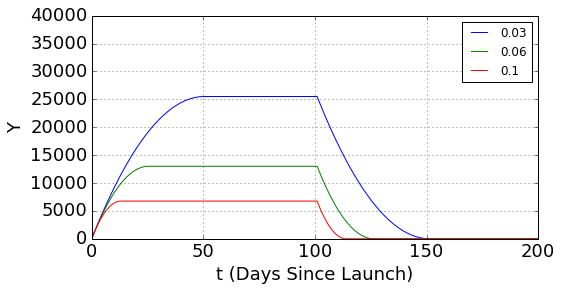

In [95]:
aDAU = computeDAULin(aCohort, .02, 200,1)
bDAU = computeDAULin(aCohort, .04, 200,1)
cDAU = computeDAULin(aCohort, .08, 200,1)

zz=np.stack((np.array(aDAU), np.array(bDAU), np.array(cDAU)),axis=1)
df = pd.DataFrame(zz, columns=['0.03', '0.06', '0.1'])

ax = df.plot(ylim=(0,40000), xlim=(0,200),  fontsize=18, grid = True, figsize=(8, 4));
ax.set_xlabel("t (Days Since Launch)", fontsize=18)
ax.set_ylabel("Y", fontsize=18)

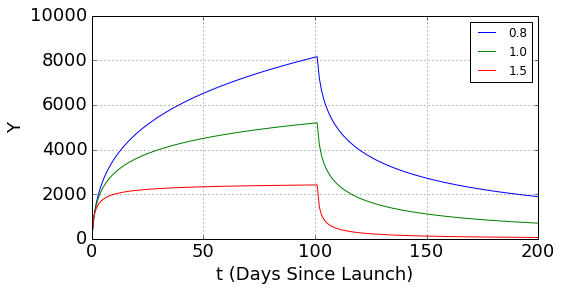

In [141]:
aDAU = computeDAUPow(aCohort, 0.8, 200,1)
bDAU = computeDAUPow(aCohort, 1.0, 200,1)
cDAU = computeDAUPow(aCohort, 1.5, 200,1)

zz=np.stack((np.array(aDAU), np.array(bDAU), np.array(cDAU)),axis=1)
df = pd.DataFrame(zz, columns=['0.8', '1.0', '1.5'])

ax = df.plot(ylim=(0,10000), xlim=(0,200),  fontsize=18, grid = True, figsize=(8, 4));
ax.set_xlabel("t (Days Since Launch)", fontsize=18)
ax.set_ylabel("Y", fontsize=18)

In [124]:
def computeNewUsersPowSat(initialCohort, generations, n, alpha, S):
# Includes saturation to limit the amount that virality can grow indefinitely
        cohorts=[initialCohort]
        for g in range(generations):
            L=len(cohorts)
            newCohort=[]
            for t in range(L):
                #Also including a viral coefficient so past cohorts can invite future ones.
                newCohort.append(alpha*cohorts[L-t-1]*powResp(t+1, n)*float((S-sum(cohorts)))/(S))
            cohorts.append(sum(newCohort))
        return cohorts

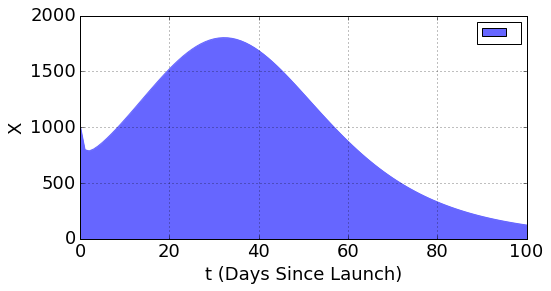

In [126]:
xCohort=computeNewUsersPowSat(1000,100, 2.4, 0.8, 500000)

df = pd.DataFrame(np.array(xCohort), columns=[''])
ax = df.plot(ylim=(0,2000), fontsize=18, kind='area', color='#6666ff', grid = True, figsize=(8, 4));
ax.set_xlabel("t (Days Since Launch)", fontsize=18)
ax.set_ylabel("X", fontsize=18)

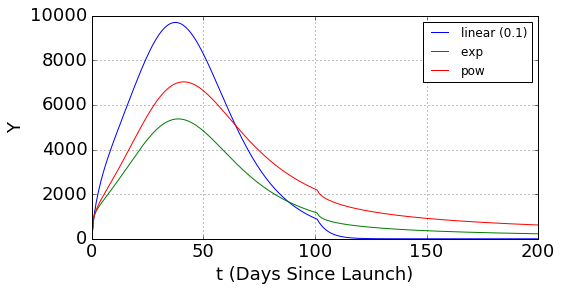

In [140]:
aDAU = computeDAUExp(xCohort, 0.2, 200,1)
bDAU = computeDAUPow(xCohort, 1.2, 200,1)
cDAU = computeDAUPow(xCohort, 1, 200,1)

zz=np.stack((np.array(aDAU), np.array(bDAU), np.array(cDAU)),axis=1)
df = pd.DataFrame(zz, columns=['linear (0.1)', 'exp ', 'pow'])

ax = df.plot(ylim=(0,10000), xlim=(0,200),  fontsize=18, grid = True, figsize=(8, 4));
ax.set_xlabel("t (Days Since Launch)", fontsize=18)
ax.set_ylabel("Y", fontsize=18)